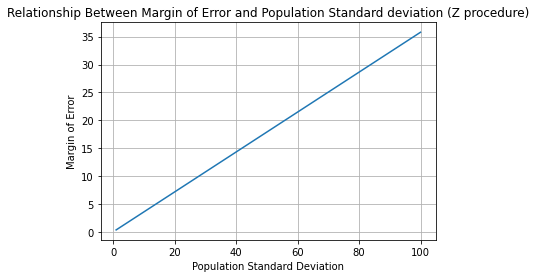

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

sample_size =30
confidence_interval = 95

# calculate the critical value for the z score
critical_value = stats.norm.ppf((1+confidence_interval /100)/2)

# generate an array of population standard deviations
population_std_devs = np.arange(1,101)

# calculate the margin of error for each population std deviation
margin_of_errors = critical_value*(population_std_devs/np.sqrt(sample_size))

# plot the relationship
plt.plot(population_std_devs, margin_of_errors)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard deviation (Z procedure)")
plt.grid(True)

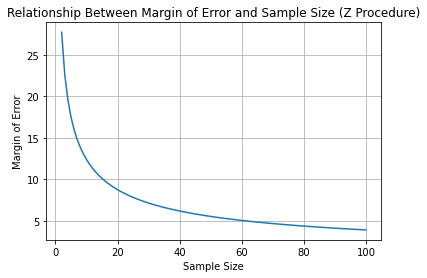

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_std_dev = 20
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_errors = critical_value * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_errors)
plt.xlabel("Sample Size")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Size (Z Procedure)")
plt.grid(True)
plt.show()


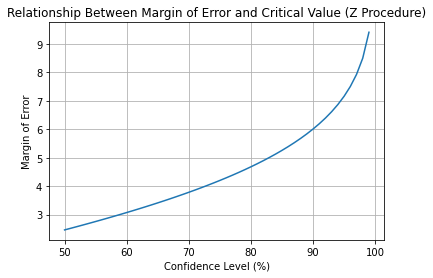

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
population_std_dev = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_errors = critical_values * (population_std_dev / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_errors)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Value (Z Procedure)")
plt.grid(True)
plt.show()


### 1309 Passangers in Titanic dataset
### Calculate avg fare using T procedure . 10 times sampling with sample size 30. Confidence interval = 95

In [11]:
train_df = pd.read_csv("D:/Megha/dsmp/datasets/titanictrain.csv")
test_df = pd.read_csv("D:/Megha/dsmp/datasets/titanictest.csv")

In [12]:
df1 = pd.concat([train_df.drop(columns=['Survived']),test_df])
df1.shape

(1309, 11)

In [13]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)
df.shape

(1309, 11)

<AxesSubplot:ylabel='Density'>

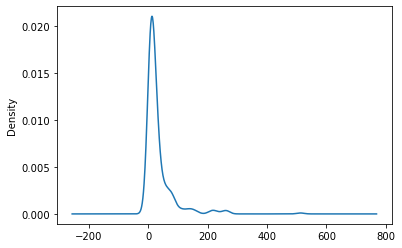

In [14]:
df['Fare'].plot(kind='kde')

In [16]:
samples =[]
stds =[]
for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())
    

In [17]:
samples=np.array(samples)

In [18]:
sampling_means = samples.mean(axis=1)
sample_std = np.mean(stds)

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

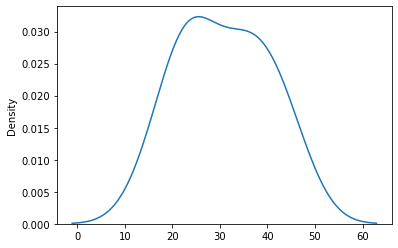

In [20]:
sns.kdeplot(sampling_means)

In [21]:
sampling_means.mean(), sampling_means.std()

(30.751306333333332, 8.902757253710964)

In [22]:
sampling_means.std()/np.sqrt(30)

1.6254136572834128

In [30]:
lower_limit = sampling_means.mean() - 2.042*(sample_std/np.sqrt(30))
upper_limit = sampling_means.mean() + 2.042*(sample_std/np.sqrt(30))

In [31]:
print('The range is ', lower_limit,' to ', upper_limit)

The range is  16.169340810025375  to  45.33327185664129


In [32]:
df['Fare'].mean()

33.295479281345614